In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')
%matplotlib inline

In [2]:
from sklearn import linear_model, datasets

In [3]:
diabetes = datasets.load_diabetes()  # load dataset

### scikit learn method

In [4]:
diabetes_X = diabetes.data[:, np.newaxis, 2]  # reshape to column vector

# train data
train_X = diabetes_X[:-20]
test_X = diabetes_X[-20:]

# test data
train_y = diabetes.target[:-20]
test_y = diabetes.target[-20:]

'''
alpha - the regularization parameter for Ridge
    Bias-Variance Tradeoff
    Good: Larger values specify stronger regularization => reduces the variance of the estimates 
    Bad:  Larger values specify stronger regularization => increases the bias of the estimates (shrinks R-squared)
'''
# NOTE (to self):
# hyper parameter (a parameter whose value is set before the learning process begins)
# also called tuning parameter (we have to find the best one)
alphas = np.linspace(1e-4, 5, 20)

model = linear_model.Ridge()
model_r_squares = []
model_params = []
for alpha in alphas:
    model_r_squares.append(model
                           .set_params(alpha=alpha)
                           .fit(train_X, train_y)
                           .score(test_X, test_y)  # calculates R-square
                          )
    model_params.append(model.coef_)

## A quick explanation for ridge regression analysis

The purpose behind regularization is to include additional information to ill-posed problems and prevent overfitting or underfitting. Ill-posed problems arise when there are:
- more equations than unknowns (overfitted)
- more unknowns than equations (underfitted)

In regression modeling, for example, a problem w/ more unknowns than equations (samples) will be sensitive to minor changes or noise in the data. The sensativity is expressed in the variance of the estimated parameters. To combate this regularization methods are used. A type of regularization is called Ridge and it works by adding weights to **shrink** the estimates (our $\beta$ parameters). However, this introduces the **Bias-Variance Tradeoff**.
- shrinked estimates reduce the variance but add bias
- larger estimates reduce bias but add variance

The above effect is controlled by a regularization parameter $\alpha$. Therefore, it must be tuned accordingly for the model to be robust.

### Scratch Method

In [5]:
scratch_model_r_squares = []
scratch_model_params = []
for alpha in alphas:
    
    # find parameters (betas)
    reg_matrix = alpha * np.identity(train_X.shape[1]) # regularization matrix
    fit_params = np.linalg.pinv(train_X.T @ train_X + reg_matrix.T @ reg_matrix) @ train_X.T @ train_y
    
    # save estimated params
    scratch_model_params.append(fit_params)
    
    # make model
    y_int = fit_params * train_X.T.mean() + train_y.mean()
    y_hat = fit_params * test_X.ravel() + y_int
    
    # measure R-square
    coef = 1 - np.var(test_y - y_hat) / np.var(test_y)
    
    # save coef
    scratch_model_r_squares.append(coef)

## Compare both models 

In [6]:
print("R-square as alpha increases:\n")
print("\tScikit-learn\tScratch Model")
print('Alphas\tR-squares\tR-squares')
for a, sci, scratch in zip(alphas, model_r_squares, scratch_model_r_squares):
    print(f'{a:.4f}\t{sci:.4f}\t\t{scratch:.4f}')

R-square as alpha increases:

	Scikit-learn	Scratch Model
Alphas	R-squares	R-squares
0.0001	0.4726		0.5396
0.2633	0.4060		0.5290
0.5264	0.3432		0.4900
0.7896	0.2899		0.4249
1.0527	0.2457		0.3522
1.3159	0.2090		0.2862
1.5790	0.1781		0.2319
1.8422	0.1519		0.1891
2.1053	0.1294		0.1557
2.3685	0.1099		0.1297
2.6316	0.0929		0.1093
2.8948	0.0780		0.0930
3.1579	0.0647		0.0800
3.4211	0.0529		0.0695
3.6842	0.0423		0.0608
3.9474	0.0327		0.0536
4.2105	0.0240		0.0476
4.4737	0.0160		0.0425
4.7368	0.0088		0.0382
5.0000	0.0021		0.0345


#### How well does the model explain the variance in the data?
R-squared, or the Coefficient of Determination is used to answer this question.<br>
The larger R-square the better the variance is explained.<br>
What we see:
- R-square decrease with increasing $\alpha$
- Model validity is sensitive to our chose in $\alpha$

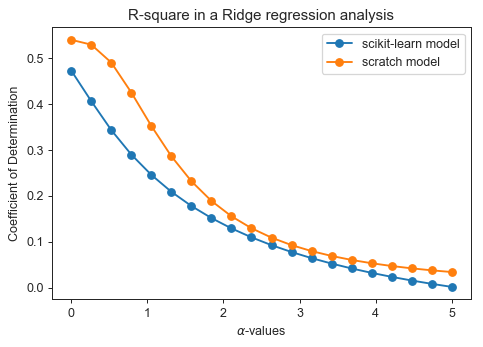

In [7]:
plt.figure(dpi=90)
plt.plot(alphas, model_r_squares, 'o-', label='scikit-learn model')
plt.plot(alphas, scratch_model_r_squares, 'o-', label='scratch model')
plt.xlabel(r'$\alpha$-values')
plt.ylabel('Coefficient of Determination')
plt.title(r'R-square in a Ridge regression analysis')
plt.legend()
plt.show()

#### What's the relationship between the estimated coefficients and our regularization parameter?
This gives a visual example of the parameter shrinkage cause by increasing $\alpha$

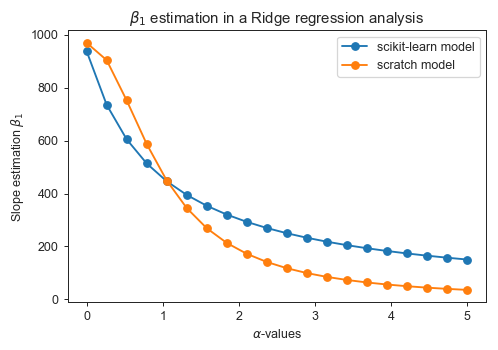

In [8]:
plt.figure(dpi=90)
plt.plot(alphas, model_params, 'o-', label='scikit-learn model')
plt.plot(alphas, scratch_model_params, 'o-', label='scratch model')
plt.xlabel(r'$\alpha$-values')
plt.ylabel(r'Slope estimation $\beta_{1}$')
plt.title(r'$\beta_{1}$ estimation in a Ridge regression analysis')
plt.legend()
plt.show()